In [9]:
import sys
!conda install --yes --prefix {sys.prefix} python-sounddevice

Vendor:  continuum
Product: anaconda
Message: trial mode expires in 30 days
/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,
Solving environment: done

# All requested packages already installed.



In [ ]:
import sounddevice as sd

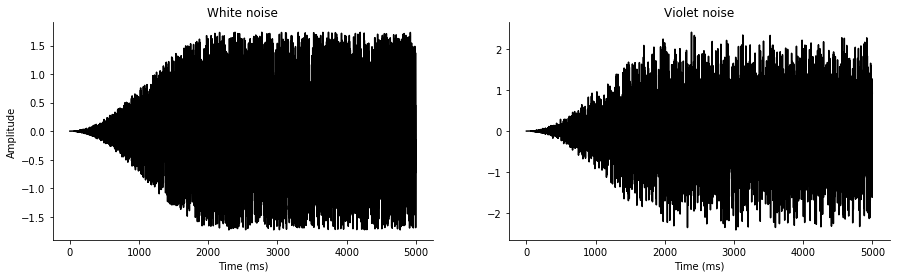

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import psychopy

sFreq = 44100 # Sampling frequency
dRamp = .05 # Ramp duration (s)
N = 2.5 # Stim time (s)

whitenoise = np.random.rand((int(N*sFreq)+1))*2-1
violetnoise = np.diff(whitenoise)/2
whitenoise = whitenoise[:-1]

# RMS normalized
whitenoise = whitenoise/np.sqrt(np.mean(whitenoise**2))
violetnoise = violetnoise/np.sqrt(np.mean(violetnoise**2))

# Generate onset and offset ramps (cosine) and envelope
ramp = 0.5*np.cos(np.linspace(0,np.pi,int(sFreq*dRamp)))
envelp = np.ones((len(whitenoise),1))
envelp[:len(ramp),0] =  np.flip(ramp+.5)
envelp[-len(ramp):,0] =  ramp+.5

# Apply ramp envelope to waveform
whitenoise = [a*b for a,b in zip(whitenoise,envelp)]
violetnoise = [a*b for a,b in zip(violetnoise,envelp)]

# Plot first part of waveforms
f, axs = plt.subplots(ncols=2,figsize=(15,4))
axs[0].plot(whitenoise[0:5000],'k')
axs[1].plot(violetnoise[0:5000],'k')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('White noise')
axs[1].set_title('Violet noise')
for ax in axs: 
    ax.set_xlabel('Time (ms)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


In [15]:
import sys
sys.executable = '/anaconda2/'

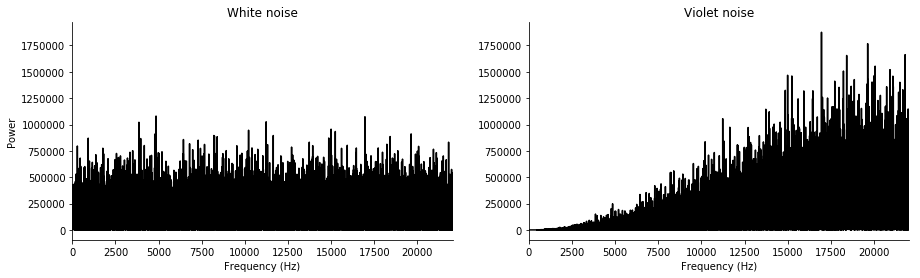

In [4]:
# Fast fourier
FSv = np.fft.fftn(violetnoise)
FSw = np.fft.fftn(whitenoise)

# Plot powerspectrum
f, axs = plt.subplots(ncols=2,figsize=(15,4),sharex=True, sharey=True)
axs[1].plot(np.linspace(-sFreq/2,sFreq/2,len(whitenoise)),np.abs(np.fft.fftshift(FSv))**2,'k')
axs[0].plot(np.linspace(-sFreq/2,sFreq/2,len(whitenoise)),np.abs(np.fft.fftshift(FSw))**2,'k')
axs[0].set_xlim([0,sFreq/2])
axs[0].set_ylabel('Power')
axs[0].set_title('White noise')
axs[1].set_title('Violet noise')
for ax in axs: 
    ax.set_xlabel('Frequency (Hz)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [ ]:
#Play violet noise
sd.play(violetnoise, sFreq)

In [33]:
#Play white noise
sd.play(whitenoise, sFreq)

In [8]:
from scipy.io.wavfile import write

data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(violetnoise)) * 32767)
write('violetnoise.wav', 44100, scaled)

In [41]:
tmat = np.zeros((6,2))
tmat[0,0] = 0.95
tmat[0,1] = 0.05
tmat[1,0] = 0.8
tmat[1,1] = 0.2
tmat[2,0] = 0.6
tmat[2,1] = 0.4

tmat[5,1] = 0.95
tmat[5,0] = 0.05
tmat[4,1] = 0.8
tmat[4,0] = 0.2
tmat[3,1] = 0.6
tmat[3,0] = 0.4

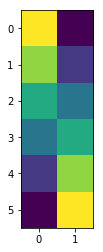

In [42]:
plt.imshow(tmat)

In [43]:

import numpy as np
import array

# Generate natural image stimuli
imgtarget1 = 4000 # Choose from van Hateren image library
imgtarget2 = 4001

filename1 = '/Users/StensolaTor/Desktop/imk04000.iml'
filename2 = '/Users/StensolaTor/Desktop/imk04001.iml'

with open(filename1, 'rb') as handle:
    s1 = handle.read()
arr1 = array.array('H', s1)
arr1.byteswap()
img1 = np.array(arr1, dtype='uint16').reshape(1024, 1536)

with open(filename2, 'rb') as handle:
    s2= handle.read()
arr2 = array.array('H', s2)
arr2.byteswap()
img2 = np.array(arr2, dtype='uint16').reshape(1024, 1536)

img1 = img1/(np.max(img1)/2.)-1
img2 = img2/(np.max(img2)/2.)-1


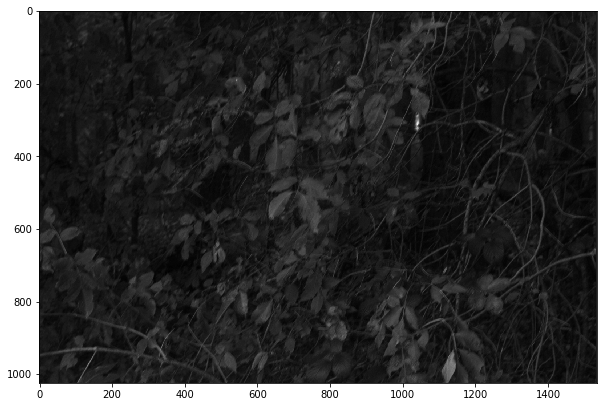

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(img1,cmap='gray')